In [1]:
from fastai.metrics import error_rate
from fastai.vision import *

In [2]:
names = ["arrietty", "castle_in_the_sky", "howls_moving_castle",
                                 "kikis_delivery_service", "mononoke", "my_neighbor_totoro",
         "only_yesterday", "ponyo", "poppy_hill", "spirited_away", "tales_from_earthsea"]

In [2]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder('', ds_tfms=tfms, size=224, valid_pct=0.2)

In [3]:
data = data.normalize(imagenet_stats)

In [5]:
data.classes, len(data.train_ds), len(data.valid_ds)

(['arrietty',
  'castle_in_the_sky',
  'howls_moving_castle',
  'kikis_delivery_service',
  'mononoke',
  'my_neighbor_totoro',
  'only_yesterday',
  'ponyo',
  'poppy_hill',
  'spirited_away',
  'tales_from_earthsea'],
 8758,
 2189)

In [4]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [7]:
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,error_rate,time
0,2.058215,1.394326,0.446323,02:57
1,1.247740,0.804212,0.252627,02:41
2,0.882409,0.578730,0.189127,02:41
3,0.701473,0.444843,0.146185,02:42
4,0.582184,0.345357,0.112380,02:41
5,0.491609,0.304416,0.100503,02:42
6,0.430586,0.271819,0.090452,02:41
7,0.371821,0.251244,0.082229,02:41
8,0.343823,0.231421,0.074920,02:40
9,0.306898,0.214322,0.067154,02:41


In [8]:
learn.save('1000-1')

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

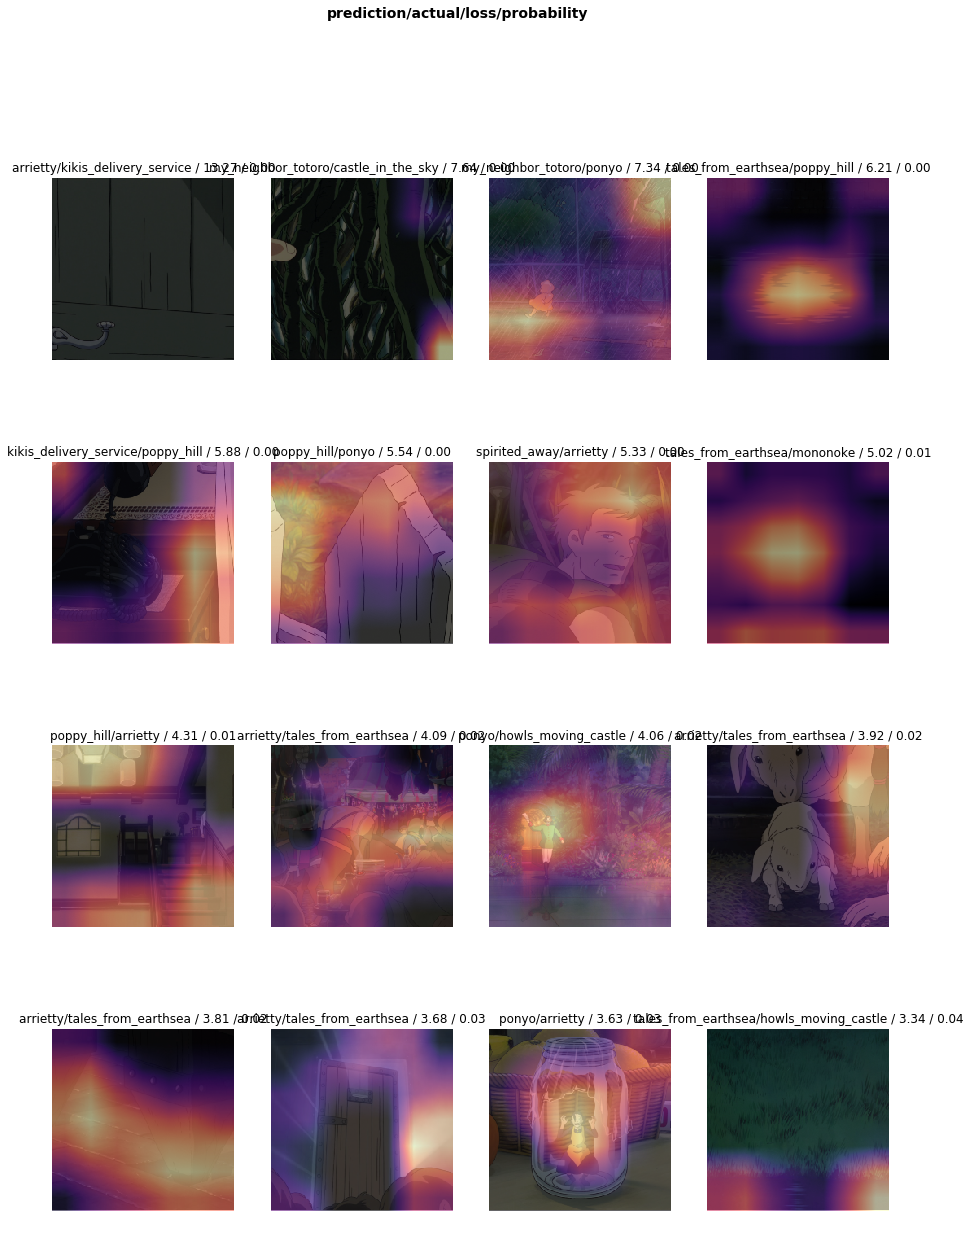

In [14]:
interp.plot_top_losses(16, figsize = (15, 20))

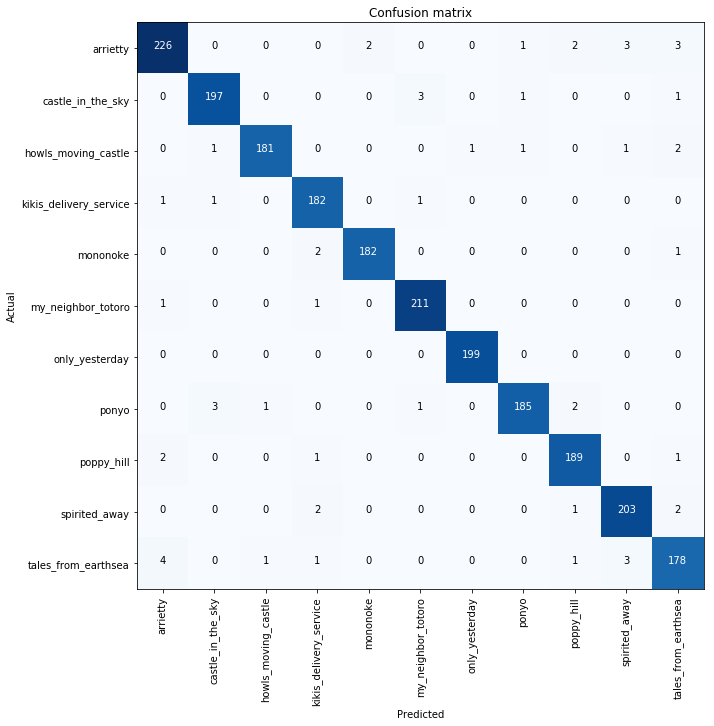

In [16]:
interp.plot_confusion_matrix(figsize=(10, 10))

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


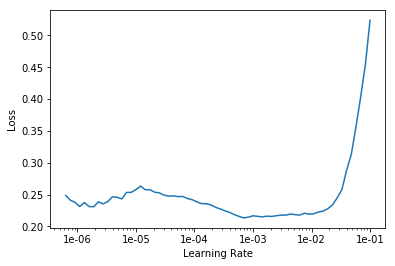

In [10]:
learn.recorder.plot()

In [11]:
learn.unfreeze()

In [12]:
learn.fit_one_cycle(15, max_lr=slice(1e-5, 8e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.217175,0.178161,0.054820,02:45
1,0.197941,0.162566,0.053906,02:46
2,0.176492,0.156875,0.050708,02:45
3,0.185533,0.140308,0.046140,02:44
4,0.137759,0.159858,0.054363,02:45
5,0.120101,0.144288,0.043399,02:45
6,0.096072,0.122713,0.039744,02:45
7,0.069144,0.119239,0.037917,02:45
8,0.054907,0.105168,0.036546,02:47
9,0.042809,0.106041,0.031978,02:45


In [7]:
learn.load('1000-2')

Learner(data=ImageDataBunch;

Train: LabelList (8758 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
mononoke,mononoke,mononoke,mononoke,mononoke
Path: .;

Valid: LabelList (2189 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
tales_from_earthsea,my_neighbor_totoro,kikis_delivery_service,arrietty,mononoke
Path: .;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e

In [8]:
learn.export()